# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


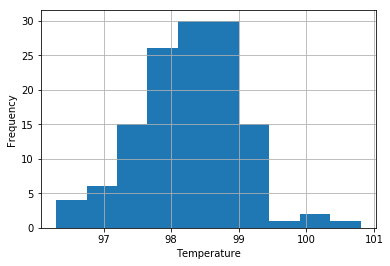

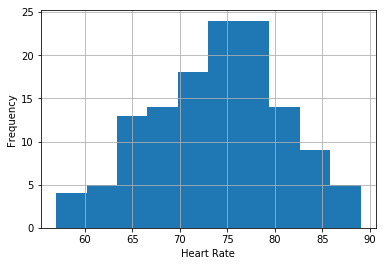

In [18]:
import matplotlib.pyplot as plt

df['temperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
df['heart_rate'].hist()
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [5]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

In [6]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

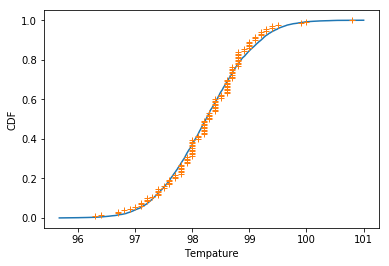

In [7]:
import numpy as np

def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

mean = np.mean(df.temperature)
std  = np.std(df.temperature)
normal = np.random.normal(mean, std, 10000)
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)
plt.plot(x_norm, y_norm)
plt.plot(x, y, marker='+', ls='none')
plt.xlabel('Tempature')
plt.ylabel('CDF')
plt.show()

You need at least 30 before you can reasonably expect an analysis based upon the normal distribution to be valid. Hence, the amount of 130 is reasonably large. Considering all the data given is of seperate people, then the sample data is Independant aswell.

In [25]:
bs_replicates = np.empty(1000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(df.temperature, len(df.temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6) / size

print('mean: {:0.5}'.format(np.mean(bs_replicates)))

mean: 98.25


The null hypothesis should be rejected. The mean body temperature of the sample set is 98.25°.

The mean of a single sample to a population with an hypothesised mean, a one-sample t-test is appropriate.

In [9]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [10]:
popmean=98.6
samp_mean=df.temperature.mean()
samp_std=df.temperature.std()
n=len(df.temperature)
statistic=(samp_mean-popmean)/(samp_std)
print("statistic: "+str(statistic))
pvalue=stats.norm.sf(abs(statistic))*2
print('pvalue: '+str(pvalue))

statistic: -0.4784196512470687
pvalue: 0.6323515496610859


We can't use Z-statistic for this as there is missing information. As the null hypothesis can't be rejected and the population is not equal to 98.6°.

In [11]:
sample_temperature=np.random.choice(a=df.temperature, size=10)
samp_mean10=sample_temperature.mean()
samp_std10=sample_temperature.std()
n10=len(sample_temperature)
statistic10=(samp_mean10-popmean)/(samp_std10)
pvalue10=stats.norm.sf(abs(statistic10))*2
print("Ztest_1sampResult(statistic="+str(statistic10)+', pvalue='+str(pvalue10)+')')
sample_ttest=stats.ttest_1samp(sample_temperature, 98.6)
print(sample_ttest)

Ztest_1sampResult(statistic=-0.6451791670810867, pvalue=0.5188110850992379)
Ttest_1sampResult(statistic=-1.93553750124326, pvalue=0.08491508125915091)


Since both the z-test, and the t-test have a p-value greater than 0.05, the null hypothesis cannot be rejected on basis of these tests. As the sample size of 10 is very small, we can not get accurate results from the data.

In [14]:
#The sample mean and standard deviation with bootstrap and frequentist approaches
x_bar = np.mean(df.temperature)
s = np.std(df.temperature)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

bootstrap_replicates = np.empty(100000)
size = len(bootstrap_replicates)
for i in range(size):
    bootstrap_sample = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)
p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))
x_bar = np.mean(bootstrap_replicates)

ci = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar))) 

sample mean: 98.25
sample standard deviation: 0.7304

p-value: 0.0
95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


According to both the Bootstrap and Frequentist approaches, using the mean we calculated (98.25°), and at a 95% confidence interval, a temperature below 96.818° or above 99.681° would be considered abnormal.

Male Temp. Mean:  98.1046153846154 Male Temp. St. Dev.:  0.6933598841828696 Male Temp. Median:  98.1 
Female Temp. Mean:  98.39384615384613 Female Temp. St. Dev.:  0.7377464486428966 Female Temp. Median:  98.4


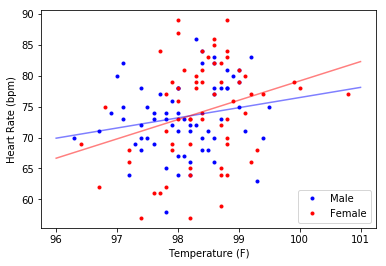

In [17]:
df_male = df[df['gender']=='M']
df_female = df[df['gender']=='F']

temps = [96, 97, 98, 99, 100, 101]
male_line = np.empty(6)
female_line = np.empty(6)

slope_male, intercept_male = np.polyfit(df_male['temperature'], df_male['heart_rate'], 1)
slope_female, intercept_female = np.polyfit(df_female['temperature'], df_female['heart_rate'], 1)

for i in range(6):
    male_line[i] = (slope_male * temps[i]) + intercept_male
    female_line[i] = (slope_female * temps[i]) + intercept_female

plt.plot(df_male['temperature'], df_male['heart_rate'], color='blue', marker='.', linestyle='none')
plt.plot(df_female['temperature'], df_female['heart_rate'], color='red', marker='.', linestyle='none')
plt.plot(temps, male_line, color='blue', alpha=0.5)
plt.plot(temps, female_line, color='red', alpha=0.5)
plt.legend(('Male', 'Female'), loc='lower right')
plt.xlabel('Temperature (F)')
plt.ylabel('Heart Rate (bpm)')

print("Male Temp. Mean: ", np.mean(df_male['temperature']), "Male Temp. St. Dev.: ", np.std(df_male['temperature']), 
      "Male Temp. Median: ", np.median(df_male['temperature']),
      "\nFemale Temp. Mean: ", np.mean(df_female['temperature']), "Female Temp. St. Dev.: ", np.std(df_female['temperature']),
      "Female Temp. Median: ", np.median(df_female['temperature']))

After plotting the data and checking the mean, median, and st.dev. of both males and females, it seems females are just a tad bit higher on average, with a slightly larger range as well. Overall, I would say that the data suggests that females experience slightly higher body temperatures, and even faster heart rates.